problem1:

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, 'Min and max temperature')

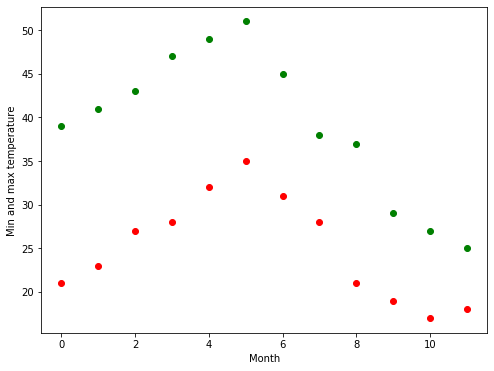

In [84]:
import numpy as np
from scipy import optimize
#from scipy.optimize import curve_fit
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.figure(figsize=(8,6))
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'ro')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [85]:
#fitting into periodic function:

def sinusoid(x,A,offset,phase):                             #periodic sive equ =   A*sine(omegax+ phase)+ offset
    return  A *np.sin(2*np.pi*x/x.max() +phase) +offset                              #here omega= 2pi/period =2pi/12months
                                                                              

In [86]:
res_max, cov_max = optimize.curve_fit(sinusoid, months,
                                      temp_max, [10,20,0])
res_min, cov_min = optimize.curve_fit(sinusoid, months,
                                      temp_min, [20,-40, 0])
print(res_max)
print(res_min)


[10.59083162 39.88861733 -0.80898778]
[ 7.74472964 25.55626462 -1.03900298]


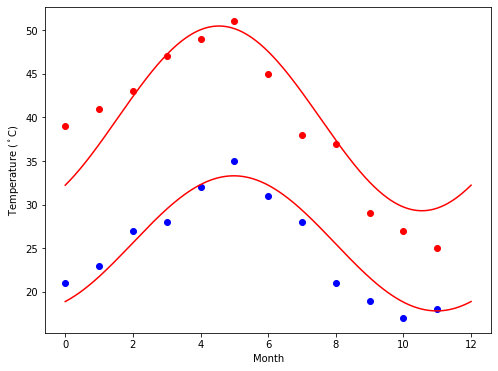

In [87]:
days = np.linspace(0, 12, num=365)
plt.figure(figsize=(8,6))
plt.plot(months, temp_max, 'ro')
plt.plot(days, sinusoid(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, sinusoid(days, *res_min), 'r-')

plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

problem2:
Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [119]:
#solution 1:Create a pie chart presenting the male/female proportion
import pandas as pd
import numpy as np
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


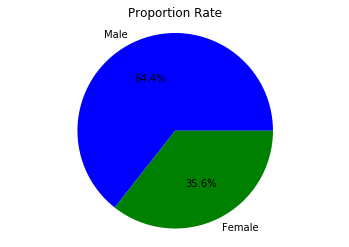

In [120]:
# Data to plot
labels = 'Male','Female'
colors = ['blue', 'green']
# Plot
plt.title('Proportion Rate')
plt.pie(titanic["sex"].value_counts(),labels=labels, colors=colors,autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()


In [121]:
#solution 2:Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
df=titanic.drop([1309])
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


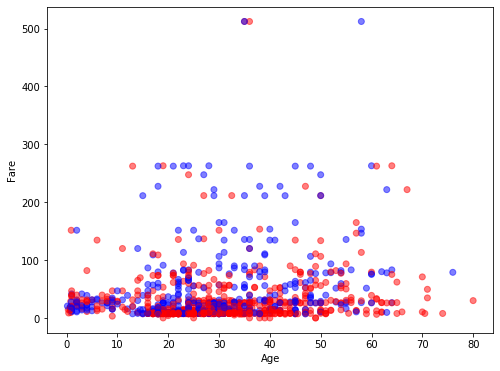

In [128]:
plt.figure(figsize=(8,6))
colors = {'male':'red', 'female':'blue'}
plt.scatter(df['age'], df['fare'], alpha=0.5, c=df['sex'].apply(lambda x: colors[x]))
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()